## Replication of electricity price forecasting

### Days of the week/ Holidays

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodel.tsa

In [2]:
df = pd.read_csv('../raw_data/cleaned_df.csv')

In [3]:
df.head()

,Unnamed: 0,Day-ahead Price [EUR/MWh],time,Actual Total Load [MW] - BZN|DK1
0,0,25.02,2015-01-01 00:00:00,1877.0
1,1,18.29,2015-01-01 01:00:00,1843.0
2,2,16.04,2015-01-01 02:00:00,1795.0
3,3,14.60,2015-01-01 03:00:00,1745.0
4,4,14.95,2015-01-01 04:00:00,1743.0


In [10]:
correlations = df.corr(method='pearson')
print(correlations['Day-ahead Price [EUR/MWh]'].sort_values(ascending=False).to_string())

Day-ahead Price [EUR/MWh]           1.000000
Actual Total Load [MW] - BZN|DK1    0.367166
Unnamed: 0                          0.212877


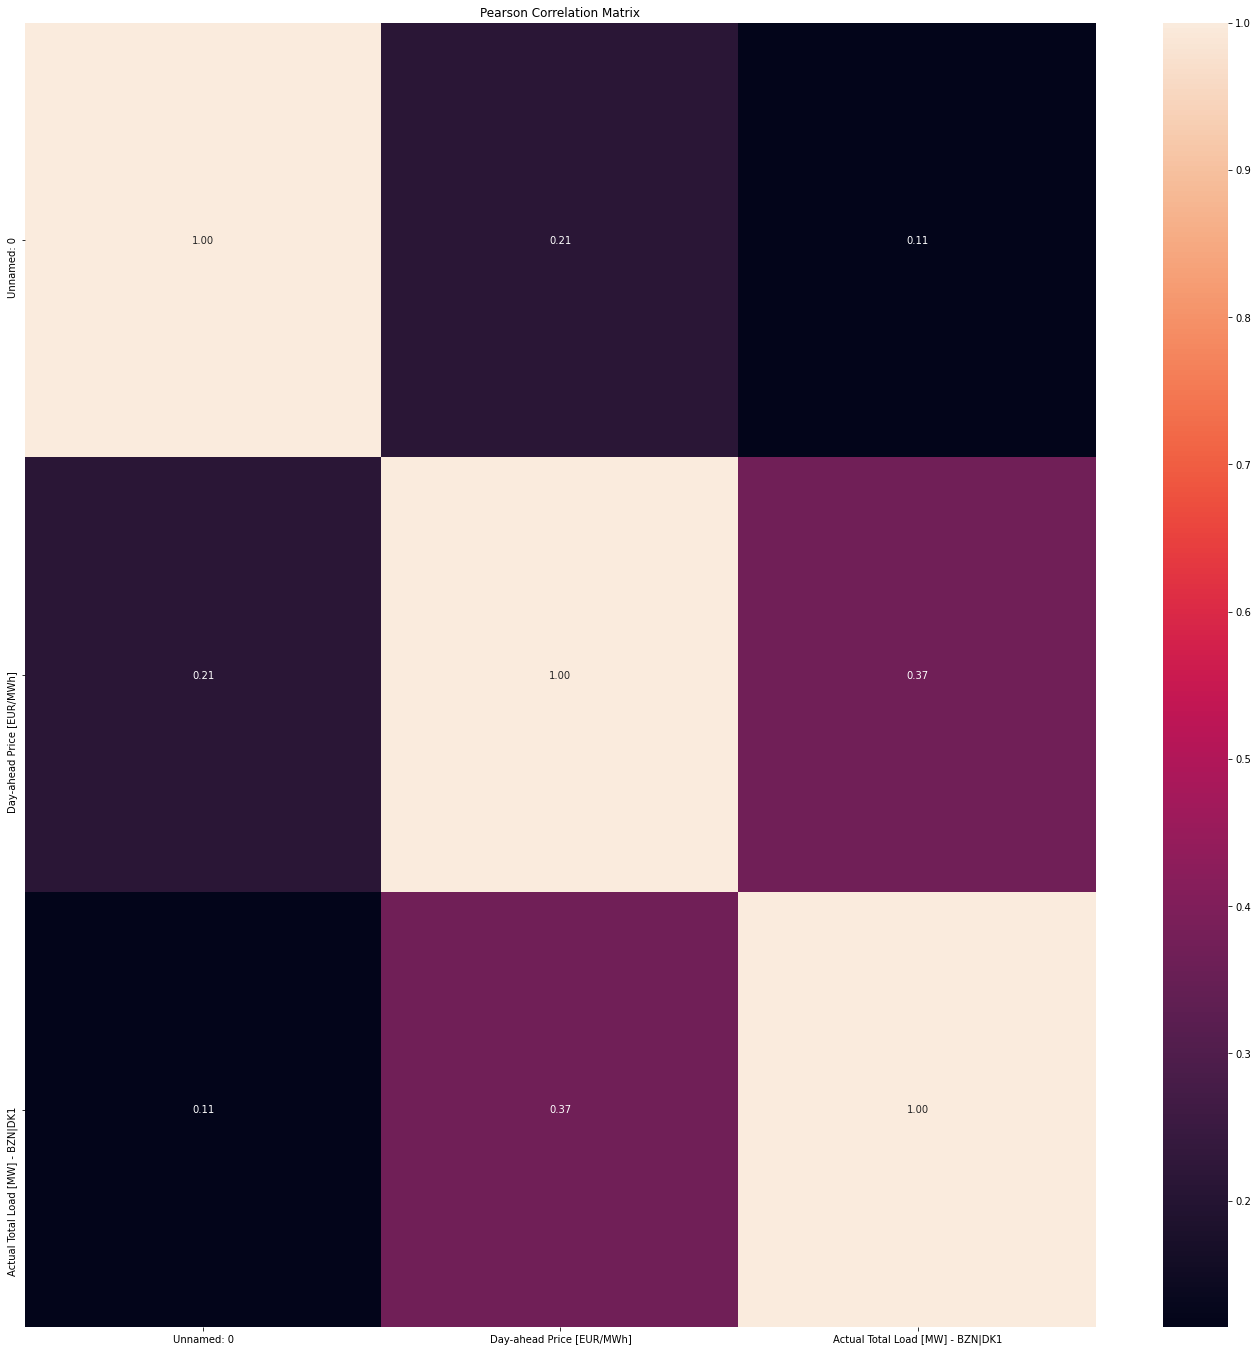

In [17]:
correlations = df.corr(method='pearson')
fig = plt.figure(figsize=(24, 24))
sns.heatmap(correlations, annot=True, fmt='.2f')
plt.title('Pearson Correlation Matrix')
plt.show()

NameError: name 'plot_acf' is not defined

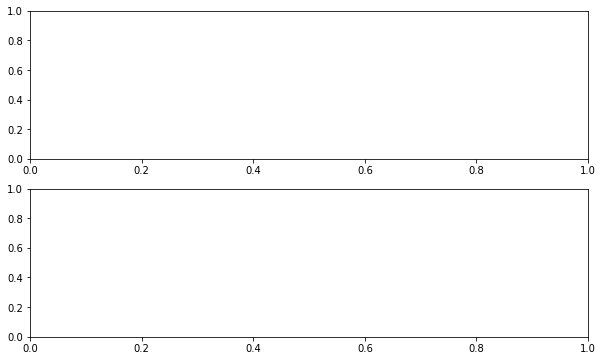

In [7]:
# Plot autocorrelation and partial autocorrelation plots

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 6))
plot_acf(df['price actual'], lags=50, ax=ax1)
plot_pacf(df['price actual'], lags=50, ax=ax2)
plt.tight_layout()
plt.show()

In [ ]:
dates = pd.date_range(start='1/1/2018', end='31/12/2018')
dates

In [1]:
dates.weekday

NameError: name 'dates' is not defined

In [ ]:
spain_holidays = holidays.CountryHoliday('ES')

In [ ]:
spain_holidays.get('2018-12-25')

In [ ]:

def get_holidays(start='1/1/2018', stop='31/12/2018', country='ES', frequency='H'):
    """
    Takes in a start and stop date and a country.
    
    Produces a dataframe with a daily date time index and columns:
    day_of_week - numerical day of the week identifier 0 for monday
    holiday_bool - boolean true or false for holiday
    holiday_name - name of the holiday if holiday_bool is true
    
    Returns a dataframe
    """
    
    #generate the range of daily dates
    dates = pd.date_range(start=start, end=stop, freq=frequency)
    
    #create the holiday object
    country_holidays = holidays.CountryHoliday(country)

    #create a list for the holiday bool and name
    holiday_list = []
    
    #loop through the dates
    for date in dates:
        #true if holiday in object, false otherwise
        holiday_bool = date in country_holidays
        holiday_names = country_holidays.get(date)
        
        holiday_list.append([holiday_bool, holiday_names])
        
    #create return dataframe
    holidays_data = pd.DataFrame(holiday_list, index=dates, columns=['holiday_bool', 'holiday_name'])
                  
    return holidays_data

In [ ]:
def get_days_dummies(start='1/1/2018', stop='31/12/2018', frequency='H'):
    """
    Takes in a start and stop date and frequency.
    
    Produces a dataframe with a date time index at the frequency input and columns:
    weekday_id - numerical day of the week identifier 0 for monday
    
    Returns a dataframe
    """
    
    #generate the range of daily dates
    dates = pd.date_range(start=start, end=stop, freq=frequency)
    
    #create a dataframe of weekday categories
    days = pd.DataFrame(list(dates.weekday), index=dates, columns=['weekday_id'])
    
    days = pd.get_dummies(days['weekday_id'])
    
    columns = ['mon', 'tue', 'wed', 'thur', 'fri', 'sat', 'sun']
    
    days.columns = columns
    
    return days

## Decomposition

In [ ]:
# Decompose the electricity price time series

res = sm.tsa.seasonal_decompose(df_energy['price actual'], model='additive')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 12))
res.observed.plot(ax=ax1, title='Observed')
res.trend.plot(ax=ax2, title='Trend')
res.resid.plot(ax=ax3, title='Residual')
res.seasonal.plot(ax=ax4, title='Seasonal')
plt.tight_layout()
plt.show()

In [ ]:
# Decompose the log electricity price time-series

res = sm.tsa.seasonal_decompose(np.log(df_energy['price actual']), model='additive')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 12))
res.observed.plot(ax=ax1, title='Observed')
res.trend.plot(ax=ax2, title='Trend')
res.resid.plot(ax=ax3, title='Residual')
res.seasonal.plot(ax=ax4, title='Seasonal')
plt.tight_layout()
plt.show()

## Autocorrelation, partial autocorrelation and cross-correlation

In [ ]:
# Plot autocorrelation and partial autocorrelation plots

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 6))
plot_acf(df_final['price actual'], lags=50, ax=ax1)
plot_pacf(df_final['price actual'], lags=50, ax=ax2)
plt.tight_layout()
plt.show()

In [ ]:
# Find the correlations between the electricity price and the rest of the features

correlations = df_final.corr(method='pearson')
print(correlations['price actual'].sort_values(ascending=False).to_string())

In [ ]:
# Plot Pearson correlation matrix

correlations = df_final.corr(method='pearson')
fig = plt.figure(figsize=(24, 24))
sns.heatmap(correlations, annot=True, fmt='.2f')
plt.title('Pearson Correlation Matrix')
plt.show()

In [ ]:
highly_correlated = abs(correlations[correlations > 0.75])
print(highly_correlated[highly_correlated < 1.0].stack().to_string())

## Feature engineering

In [ ]:
# Generate 'hour', 'weekday' and 'month' features

for i in range(len(df_final)):
    position = df_final.index[i]
    hour = position.hour
    weekday = position.weekday()
    month = position.month
    df_final.loc[position, 'hour'] = hour
    df_final.loc[position, 'weekday'] = weekday
    df_final.loc[position, 'month'] = month

In [ ]:
# Generate 'business hour' feature

for i in range(len(df_final)):
    position = df_final.index[i]
    hour = position.hour
    if ((hour > 8 and hour < 14) or (hour > 16 and hour < 21)):
        df_final.loc[position, 'business hour'] = 2
    elif (hour >= 14 and hour <= 16):
        df_final.loc[position, 'business hour'] = 1
    else:
        df_final.loc[position, 'business hour'] = 0

In [ ]:
# Generate 'weekend' feature

for i in range(len(df_final)):
    position = df_final.index[i]
    weekday = position.weekday()
    if (weekday == 6):
        df_final.loc[position, 'weekday'] = 2
    elif (weekday == 5):
        df_final.loc[position, 'weekday'] = 1
    else:
        df_final.loc[position, 'weekday'] = 0

In [ ]:
# Generate 'temp_range' for each city

cities = ['Barcelona', 'Bilbao', 'Madrid', 'Seville', 'Valencia']

for i in range(len(df_final)):
    position = df_final.index[i]
    for city in cities:
        temp_max = df_final.loc[position, 'temp_max_{}'.format(city)]
        temp_min = df_final.loc[position, 'temp_min_{}'.format(city)]
        df_final.loc[position, 'temp_range_{}'.format(city)] = abs(temp_max - temp_min)

In [ ]:
# Calculate the weight of every city

total_pop = 6155116 + 5179243 + 1645342 + 1305342 + 987000

weight_Madrid = 6155116 / total_pop
weight_Barcelona = 5179243 / total_pop
weight_Valencia = 1645342 / total_pop
weight_Seville = 1305342 / total_pop
weight_Bilbao = 987000 / total_pop

In [ ]:
cities_weights = {'Madrid': weight_Madrid, 
                  'Barcelona': weight_Barcelona,
                  'Valencia': weight_Valencia,
                  'Seville': weight_Seville,
                  'Bilbao': weight_Bilbao}

In [ ]:
# Generate 'temp_weighted' feature

for i in range(len(df_final)):
    position = df_final.index[i]
    temp_weighted = 0
    for city in cities:
        temp = df_final.loc[position, 'temp_{}'.format(city)]
        temp_weighted += temp * cities_weights.get('{}'.format(city))
    df_final.loc[position, 'temp_weighted'] = temp_weighted

## Electricity price forecasting

### ARIMA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import json
%matplotlib inline
sns.set_style('dark')

#import libraries for statistical analysis
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults
from statsmodels.graphics.gofplots import qqplot


from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler


#import libraries for parallel processing
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings

#import custom utils including persistence testbench
from model_persistence import get_persistence_dataset, train_test_split, walk_forward_evaluation, calculate_errors, plot_error
from create_day_types import get_days_dummies

In [ ]:
#load the dataset and crete the train and test sets.
data = get_persistence_dataset(transformed=True)

#split using default date 2017-12-31
train, test = train_test_split(data)
train.head(3)

In [ ]:

train.index.min(), train.index.max(),test.index.min(), test.index.max()

In [ ]:
#flatten the train set because the statistical model only accepts univariate series
train_flat = train.values.flatten()

Stationery test over 1 day

In [ ]:
print(pd.Series(adful_t[0:4], index=['Test Statistic','p-value','#Lags','Observations']))

Stationery teset over 1 week

In [3]:
adful_t = sm.tsa.adfuller(train_flat, maxlag=24*30)
print(pd.Series(adful_t[0:4], index=['Test Statistic','p-value','#Lags','Observations']))

NameError: name 'sm' is not defined

Autocorrelation and partial autocoreelation

In [ ]:
#plot the ACF 
fig, axs = plt.subplots(2,2, figsize=(10,10))

lags = [48, 24*7, 24*14, 24*365]

for lag, ax in zip(lags, axs.flatten()):
    plot_acf(train_flat, lags=lag, ax=ax)
plt.show()

In [ ]:
#plot the ACF 
fig, axs = plt.subplots(2,2, figsize=(10,10))

lags = [24, 24*3, 24*7, 24*14]

for lag, ax in zip(lags, axs.flatten()):
    plot_pacf(train_flat, lags=lag, ax=ax)
plt.show()

#### ARIMA Model baseline

In [ ]:
#run the model for one forecasting period and estimate how long it will take to implement

def test_run_ARIMA(train_flat):
    #setup a model instence
    model_24 = ARIMA(train_flat, order=(24, 0, 0))

    #fit the model
    model_fit_24 = model_24.fit()

    #run the 24 interval forecast and return the operation time
    forecast_24, std_24, intervals_24 = model_fit_24.forecast(24)
    
    return forecast_24, std_24, intervals_24
    
%time forecast_24, std_24, intervals_24 = test_run_ARIMA(train_flat)

In [ ]:
#plot the result and get an idea if the forecast is in the right direction
fig = plt.figure(figsize=(8,7))

plt.plot(forecast_24, label='Predicted day')
plt.plot(intervals_24[:,0], label='High/Low confidence interval', color='gray')
plt.plot(intervals_24[:,1], color='gray')
plt.plot(test.iloc[0,:], label='Actual day')
plt.xticks(rotation=45)
plt.title('ARIMA Forecast vs. Actual for first day in test set')
plt.xlabel('MWh')
plt.ylabel('Hour of Day')
plt.legend()
plt.show()

In [ ]:
#calculate the root mean squared error of the single test run
print('ARIMA 1 step walk forward RMSE: {0:.2f} MWh' .format(mean_absolute_error(test.iloc[0,:], forecast_24)))

ARIMA model function

In [ ]:
#define a model to insert into the training rig created in the persistence workbook
def arima_model(history, config):
    
    #convert dataframe to numpy array and flatten into column vector
    history_flat = history.values.flatten()
    
    p,d,q = config
    
    #initalize the ARIMA model
    model = ARIMA(history_flat, order=(p, d, q))
    
    #fit model
    model_fit = model.fit()
    
    #generate forecast for the next 24 hours
    forecast, _, _ = model_fit.forecast(24)
    
    #save the model
    #name = 'model-' + str(datetime.datetime.now()) +'.pkl'
    #model_fit.save(name)
    
    #print('Done. Model Saved.')
    
    return forecast

In [ ]:
errors, errors_mean, prediction = walk_forward_evaluation(arima_model, train, test, 'arima_model', config=(1,0,0))

In [ ]:
plot_error(errors, result_set=['arima_model'], title='Baseline ARIMA model errors (1,0,0)')

In [ ]:
def plot_model_rmse_and_loss(history):
    
    # Evaluate train and validation accuracies and losses
    
    train_rmse = history.history['root_mean_squared_error']
    val_rmse = history.history['val_root_mean_squared_error']
    
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # Visualize epochs vs. train and validation accuracies and losses
    
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.plot(train_rmse, label='Training RMSE')
    plt.plot(val_rmse, label='Validation RMSE')
    plt.legend()
    plt.title('Epochs vs. Training and Validation RMSE')
    
    plt.subplot(1, 2, 2)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend()
    plt.title('Epochs vs. Training and Validation Loss')
    
    plt.show()

### XGBoost

### LSTM

In [ ]:
tf.keras.backend.clear_session()

multivariate_lstm = tf.keras.models.Sequential([
    LSTM(100, input_shape=input_shape, 
         return_sequences=True),
    Flatten(),
    Dense(200, activation='relu'),
    Dropout(0.1),
    Dense(1)
])

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
                   'multivariate_lstm.h5', monitor=('val_loss'), save_best_only=True)
optimizer = tf.keras.optimizers.Adam(lr=6e-3, amsgrad=True)

multivariate_lstm.compile(loss=loss,
                          optimizer=optimizer,
                          metrics=metric)

In [ ]:
history = multivariate_lstm.fit(train, epochs=120,
                                validation_data=validation,
                                callbacks=[early_stopping, 
                                           model_checkpoint])

In [ ]:
plot_model_rmse_and_loss(history)

In [ ]:
multivariate_lstm = tf.keras.models.load_model('multivariate_lstm.h5')

forecast = multivariate_lstm.predict(X_test)
lstm_forecast = scaler_y.inverse_transform(forecast)

rmse_lstm = sqrt(mean_squared_error(y_test_inv,
                                    lstm_forecast))
print('RMSE of hour-ahead electricity price LSTM forecast: {}'
      .format(round(rmse_lstm, 3)))

### Stacked LSTM

In [ ]:
tf.keras.backend.clear_session()

multivariate_stacked_lstm = tf.keras.models.Sequential([
    LSTM(250, input_shape=input_shape, 
         return_sequences=True),
    LSTM(150, return_sequences=True),
    Flatten(),
    Dense(150, activation='relu'),
    Dropout(0.1),
    Dense(1)
])

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
                   'multivariate_stacked_lstm.h5', save_best_only=True)
optimizer = tf.keras.optimizers.Adam(lr=3e-3, amsgrad=True)

multivariate_stacked_lstm.compile(loss=loss,
                                  optimizer=optimizer,
                                  metrics=metric)

In [ ]:
history = multivariate_stacked_lstm.fit(train, epochs=120,
                                validation_data=validation,
                                callbacks=[early_stopping, 
                                           model_checkpoint])

In [ ]:
plot_model_rmse_and_loss(history)

In [ ]:
multivariate_stacked_lstm = tf.keras.models.load_model('multivariate_stacked_lstm.h5')

forecast = multivariate_stacked_lstm.predict(X_test)
multivariate_stacked_lstm_forecast = scaler_y.inverse_transform(forecast)

rmse_mult_stacked_lstm = sqrt(mean_squared_error(y_test_inv, 
                                                 multivariate_stacked_lstm_forecast))
print('RMSE of hour-ahead electricity price multivariate Stacked LSTM forecast: {}'
      .format(round(rmse_mult_stacked_lstm, 3)))